In [1]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [3]:
import datetime
import logging
import os

In [4]:
import numpy as np 
import tensorflow as tf

In [4]:
from tensorflow.keras import activations
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow import feature_column as fc

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [134]:
import keras

In [2]:
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
import xgboost as xgb

Applied 30 days prior data to predict D-15

Apply prior 15 days to predict D1 (Feature is Disbursement + D0 )
Apply prior 16 days to predict D2, (Feature is Disbursement + D0, D1)
...
Apply prior 30 days to predict D15  (Feature is Disbursement + D0, D1, ..D14)

And then to train another model to based on D1~D15 to predict D16 to D30

In [5]:
!cp ~/Downloads/loss_arrival.csv ./

In [7]:
!ls

loss_arrival.csv           taxi-train.csv
lr_time_series_model.ipynb taxi-valid.csv
ltv_tf_version.ipynb       taxifare.ipynb


In [322]:
df = pd.read_csv("loss_arrival.csv")

In [9]:
df.columns

Index(['DISBURSEMENT_DS', 'TOTAL_RECEIVABLES', 'TOTAL_DISBURSEMENT_AMOUNT',
       'TOTAL_PLEDGED_REVENUE', 'DIFF', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE',
       'D_2_LOSS_RATE', 'D_3_LOSS_RATE', 'D_4_LOSS_RATE',
       ...
       'D_351_LOSS_RATE', 'D_352_LOSS_RATE', 'D_353_LOSS_RATE',
       'D_354_LOSS_RATE', 'D_355_LOSS_RATE', 'D_356_LOSS_RATE',
       'D_357_LOSS_RATE', 'D_358_LOSS_RATE', 'D_359_LOSS_RATE',
       'D_360_LOSS_RATE'],
      dtype='object', length=366)

In [324]:
df.head(4)

,DISBURSEMENT_DS,TOTAL_RECEIVABLES,TOTAL_DISBURSEMENT_AMOUNT,TOTAL_PLEDGED_REVENUE,DIFF,D_0_LOSS_RATE,D_1_LOSS_RATE,D_2_LOSS_RATE,D_3_LOSS_RATE,D_4_LOSS_RATE,...,D_351_LOSS_RATE,D_352_LOSS_RATE,D_353_LOSS_RATE,D_354_LOSS_RATE,D_355_LOSS_RATE,D_356_LOSS_RATE,D_357_LOSS_RATE,D_358_LOSS_RATE,D_359_LOSS_RATE,D_360_LOSS_RATE
0,2024-05-06 00:00:00,8225122.28,7760940.0,464182.28,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2024-05-05 00:00:00,8312938.86,7827320.0,485648.86,-30.0,0.996892,0.996892,0.996892,0.996892,0.996892,...,0.996892,0.996892,0.996892,0.996892,0.996892,0.996892,0.996892,0.996892,0.996892,0.996892
2,2024-05-04 00:00:00,13717385.91,12933305.0,784080.91,0.0,0.992535,0.992535,0.992535,0.992535,0.992535,...,0.992535,0.992535,0.992535,0.992535,0.992535,0.992535,0.992535,0.992535,0.992535,0.992535
3,2024-05-03 00:00:00,27111740.45,25692410.0,1419390.45,-60.0,0.986450,0.986450,0.986450,0.986450,0.986450,...,0.986450,0.986450,0.986450,0.986450,0.986450,0.986450,0.986450,0.986450,0.986450,0.986450


In [321]:
df.dtypes

TOTAL_RECEIVABLES                   float64
TOTAL_DISBURSEMENT_AMOUNT           float64
TOTAL_PLEDGED_REVENUE               float64
DIFF                                float64
D_0_LOSS_RATE                       float64
                                  ...      
D_358_LOSS_RATE                     float64
D_359_LOSS_RATE                     float64
D_360_LOSS_RATE                     float64
timestamp                    datetime64[ns]
disbursement_update                 float64
Length: 367, dtype: object

In [10]:
df['timestamp'] = pd.to_datetime(df['DISBURSEMENT_DS'])

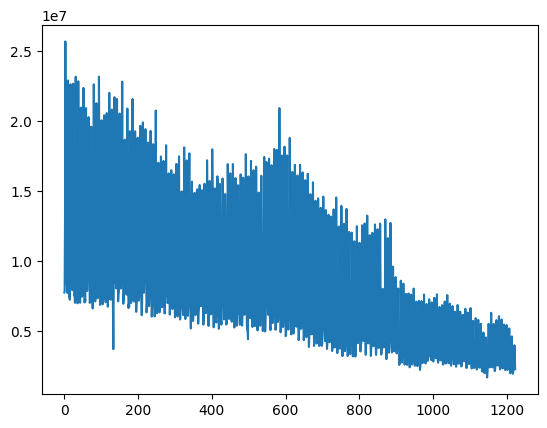

In [11]:
plt.plot(df['TOTAL_DISBURSEMENT_AMOUNT'])

In [39]:
fft = tf.signal.rfft(dfupdate['D_0_LOSS_RATE'][0:-14])

In [40]:
f_per_dataset = np.arange(0, len(fft))

In [41]:
f_per_dataset[-1]

604

In [44]:
n_sample = days_per_year = len(dfupdate['D_1_LOSS_RATE'][0:-14])
days_per_year = 365
years_per_dataset = n_sample/days_per_year
f_per_year = f_per_dataset/years_per_dataset

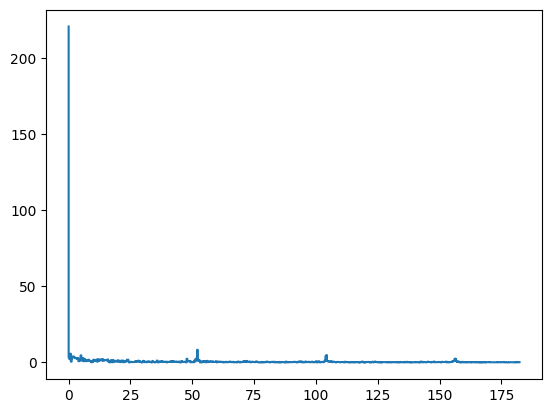

In [45]:
plt.step(f_per_year, np.abs(fft))

In [327]:
from statsmodels.graphics.tsaplots import plot_acf

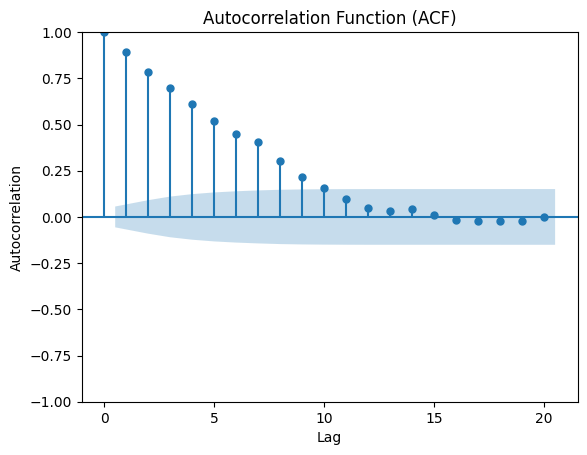

In [330]:
plot_acf(df['D_0_LOSS_RATE'][0:-14], lags=20)
plt.xlabel('Lag')
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.show()

In [331]:
from statsmodels.tsa.stattools import adfuller

In [332]:

result = adfuller(df['D_0_LOSS_RATE'][0:-14])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -6.507681289666503
p-value: 1.120526421311793e-08
Critical Values:
   1%: -3.4358757250664356
   5%: -2.8639800492824805
   10%: -2.568069130240666


In [334]:
from statsmodels.stats.diagnostic import runs

result_runs = runs(time_series_data)
print('Runs Test Results:')
print('Z-statistic:', result_runs.statistic)
print('p-value:', result_runs.pvalue)


ImportError: cannot import name 'runs' from 'statsmodels.stats.diagnostic' (/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/statsmodels/stats/diagnostic.py)

In [46]:
np.abs(fft[50:60])

array([1.5263455 , 1.6252505 , 1.2688699 , 1.9698788 , 0.7115845 ,
       0.2333174 , 0.12186772, 1.1107813 , 1.5622935 , 0.1705164 ],
      dtype=float32)

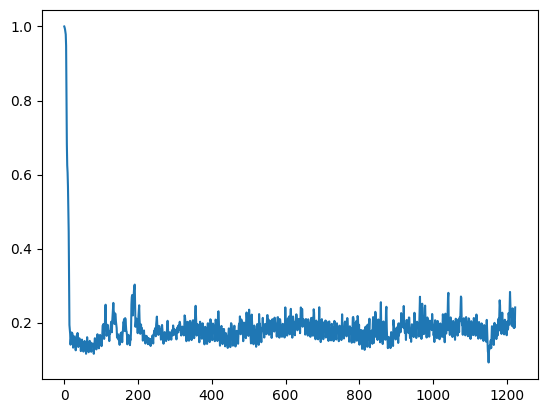

In [28]:
plt.plot(df['D_0_LOSS_RATE'])

In [36]:
dfupdate = df.loc[::-1]

In [13]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
TOTAL_RECEIVABLES,1223.0,8055287.474612,1853156.56,4403442.24,6919126.36,9786201.74,27111740.45,4743590.350282
TOTAL_DISBURSEMENT_AMOUNT,1223.0,7562196.035756,1681060.0,4104795.0,6484065.0,9254395.5,25692410.0,4519036.399925
TOTAL_PLEDGED_REVENUE,1223.0,493130.616394,172096.56,329136.595,421107.63,605781.825,1419390.45,229201.153362
DIFF,1223.0,-39.177539,-983.5,-18.125,0.0,0.0,0.0,102.022827
D_0_LOSS_RATE,1223.0,0.188893,0.092222,0.165319,0.183051,0.19788,1.0,0.069908
...,...,...,...,...,...,...,...,...
D_357_LOSS_RATE,1223.0,0.028422,0.009313,0.015584,0.019706,0.02389,1.0,0.080051
D_358_LOSS_RATE,1223.0,0.02842,0.009313,0.015579,0.019701,0.023884,1.0,0.080051
D_359_LOSS_RATE,1223.0,0.028418,0.009313,0.015579,0.019701,0.023882,1.0,0.080051
D_360_LOSS_RATE,1223.0,0.028416,0.009313,0.015571,0.019701,0.02388,1.0,0.080051


In [51]:
dfupdate.iloc[10, 6:]

D_1_LOSS_RATE                 0.180029
D_2_LOSS_RATE                 0.170145
D_3_LOSS_RATE                 0.160479
D_4_LOSS_RATE                 0.153347
D_5_LOSS_RATE                 0.143671
                          ...         
D_357_LOSS_RATE               0.022252
D_358_LOSS_RATE               0.022236
D_359_LOSS_RATE               0.022225
D_360_LOSS_RATE               0.022218
timestamp          2021-01-10 00:00:00
Name: 1212, Length: 361, dtype: object

In [60]:
length = len(dfupdate.iloc[10, 5:-1])

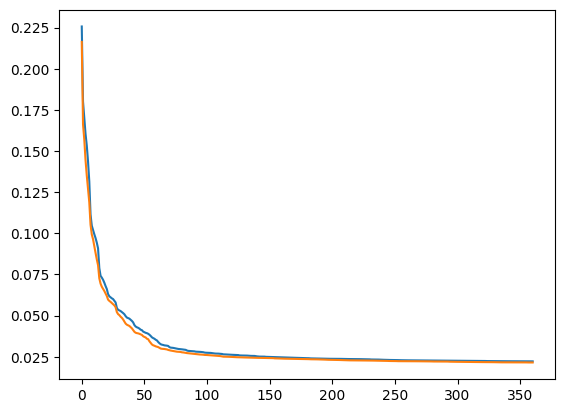

In [61]:
plt.plot(np.arange(0, length), dfupdate.iloc[10, 5:-1])
plt.plot(np.arange(0, length), dfupdate.iloc[12, 5:-1])

In [14]:
disbursement_mean = df['TOTAL_DISBURSEMENT_AMOUNT'].mean()
disbursement_var = df['TOTAL_DISBURSEMENT_AMOUNT'].std()

In [15]:
df['disbursement_update'] = (df['TOTAL_DISBURSEMENT_AMOUNT'] - disbursement_mean) / disbursement_var

In [16]:
columns = ['timestamp', 'disbursement_update']
other_columns = []
for i in range(0, 180):
    other_columns.append('D_' + str(i) + '_LOSS_RATE')
columns_combine = columns + other_columns

In [23]:
n = 1

In [27]:
df_1 = df.loc[:-14-n, columns_combine]

In [44]:
df.columns

Index(['DISBURSEMENT_DS', 'TOTAL_RECEIVABLES', 'TOTAL_DISBURSEMENT_AMOUNT',
       'TOTAL_PLEDGED_REVENUE', 'DIFF', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE',
       'D_2_LOSS_RATE', 'D_3_LOSS_RATE', 'D_4_LOSS_RATE',
       ...
       'D_353_LOSS_RATE', 'D_354_LOSS_RATE', 'D_355_LOSS_RATE',
       'D_356_LOSS_RATE', 'D_357_LOSS_RATE', 'D_358_LOSS_RATE',
       'D_359_LOSS_RATE', 'D_360_LOSS_RATE', 'timestamp',
       'disbursement_update'],
      dtype='object', length=368)

In [47]:
df.drop(['DISBURSEMENT_DS'], inplace=True, axis=1)

In [48]:
train_df = df[0:1065]
val_df = df[1005:1080]
test_df = df[1118:1193]

In [63]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None, feature_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    self.feature_columns = feature_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
   
    self.column_indices = {name: i for i, name in
                           enumerate(feature_columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [31]:
df.columns

Index(['DISBURSEMENT_DS', 'TOTAL_RECEIVABLES', 'TOTAL_DISBURSEMENT_AMOUNT',
       'TOTAL_PLEDGED_REVENUE', 'DIFF', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE',
       'D_2_LOSS_RATE', 'D_3_LOSS_RATE', 'D_4_LOSS_RATE',
       ...
       'D_353_LOSS_RATE', 'D_354_LOSS_RATE', 'D_355_LOSS_RATE',
       'D_356_LOSS_RATE', 'D_357_LOSS_RATE', 'D_358_LOSS_RATE',
       'D_359_LOSS_RATE', 'D_360_LOSS_RATE', 'timestamp',
       'disbursement_update'],
      dtype='object', length=368)

In [99]:
w1 = WindowGenerator(input_width=60, label_width=15, shift=15, label_columns=['D_0_LOSS_RATE'], 
                     feature_columns=['disbursement_update', 'D_0_LOSS_RATE'])

In [87]:
w1

Total window size: 75
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
Label column name(s): ['D_0_LOSS_RATE']

In [66]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)
    if self.feature_columns is not None:
        inputs = tf.stack(
            [inputs[:, :, self.column_indices[name]] for name in self.feature_columns], 
            axis=-1
        )
    
    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [61]:
#train_df = train_df.drop(['timestamp'], axis=1)
val_df = val_df.drop(['timestamp'], axis=1)
test_df = test_df.drop(['timestamp'], axis=1)

In [51]:
train_df.dtypes

TOTAL_RECEIVABLES            float64
TOTAL_DISBURSEMENT_AMOUNT    float64
TOTAL_PLEDGED_REVENUE        float64
DIFF                         float64
D_0_LOSS_RATE                float64
                              ...   
D_357_LOSS_RATE              float64
D_358_LOSS_RATE              float64
D_359_LOSS_RATE              float64
D_360_LOSS_RATE              float64
disbursement_update          float64
Length: 366, dtype: object

In [52]:
example_window = tf.stack([np.array(train_df[:w1.total_window_size].astype(np.float32)),
                           np.array(train_df[100:100+w1.total_window_size].astype(np.float32)),
                           np.array(train_df[200:200+w1.total_window_size]).astype(np.float32)])

In [53]:
example_inputs, example_labels = w1.split_window(example_window)

In [55]:
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 75, 366)
Inputs shape: (3, 60, 2)
Labels shape: (3, 15, 1)


In [67]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [68]:
train_df.shape

(1065, 366)

In [70]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [98]:
def plot(self, model=None, plot_col='D_0_LOSS_RATE', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [88]:
w1.train.element_spec

(TensorSpec(shape=(None, 60, 2), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 15, 1), dtype=tf.float32, name=None))

In [89]:
for example_inputs, example_labels in w1.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 60, 2)
Labels shape (batch, time, features): (32, 15, 1)


2024-05-15 13:26:12.550721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [74]:
OUT_STEPS = 15

In [75]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

In [76]:
last_baseline = MultiStepLastBaseline()

In [77]:
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [78]:
multi_val_performance = {}
multi_performance = {}

In [80]:
multi_val_performance['Last'] = last_baseline.evaluate(w1.val, return_dict=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1821582688256.0000 - mean_absolute_error: 865900.0625


In [81]:
multi_performance['Last'] = last_baseline.evaluate(w1.test, verbose=0, return_dict=True)

In [92]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(w1.val, return_dict=True)
multi_performance['Repeat'] = repeat_baseline.evaluate(w1.test, verbose=0, return_dict=True)
w1.plot(repeat_baseline)

ValueError: Dimensions must be equal, but are 15 and 60 for '{{node compile_loss/mean_squared_error/sub}} = Sub[T=DT_FLOAT](IteratorGetNext:1, IteratorGetNext)' with input shapes: [?,15,1], [?,60,2].

In [84]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [100]:
OUT_STEPS=15
num_features=2
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, w1)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 82901257420800.0000 - mean_absolute_error: 8022844.0000 - val_loss: 14760148992000.0000 - val_mean_absolute_error: 3624770.5000
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83770644365312.0000 - mean_absolute_error: 8064767.5000 - val_loss: 14760146894848.0000 - val_mean_absolute_error: 3624770.2500
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81509218254848.0000 - mean_absolute_error: 7932595.0000 - val_loss: 14760146894848.0000 - val_mean_absolute_error: 3624770.2500
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82434523660288.0000 - mean_absolute_error: 7983787.5000 - val_loss: 14760144797696.0000 - val_mean_absolute_error: 3624770.2500
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82944702021632.0000 - mean_absolute_error: 8021952.5000 - val_loss: 14760143749120.0000 - val_mean_absolute_error: 3624769.5000
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 836922108805

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14760122777600.0000 - mean_absolute_error: 3624766.7500


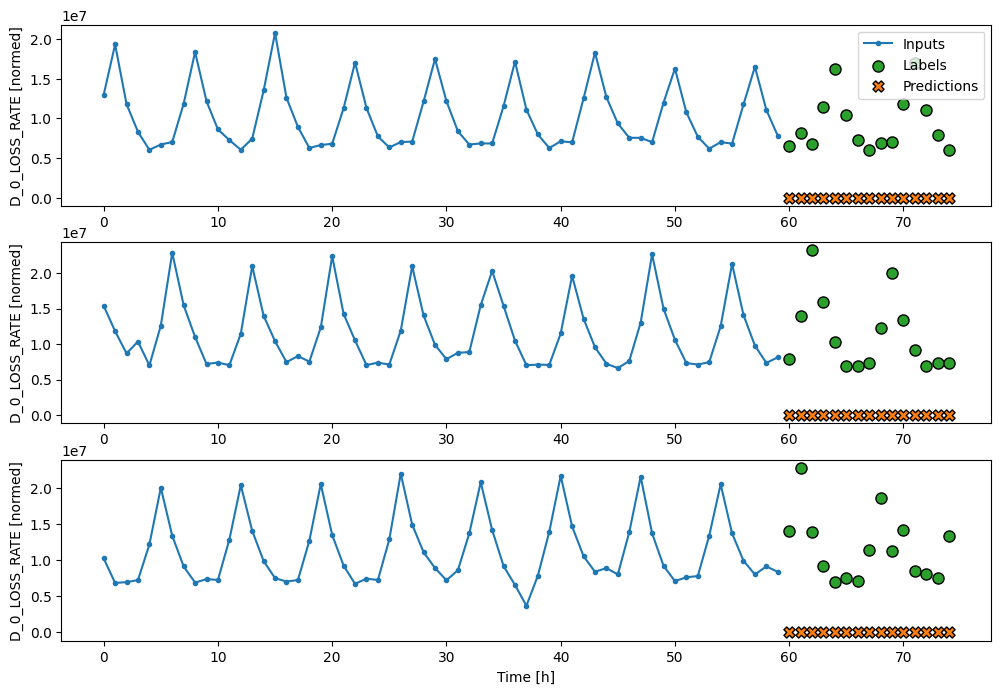

In [101]:
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(w1.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(w1.test, verbose=0, return_dict=True)
w1.plot(multi_lstm_model)

In [102]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [103]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [104]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [105]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [106]:
history = compile_and_fit(feedback_model, w1)

Epoch 1/20


/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/layers/layer.py:1291: UserWarning: Layer 'feed_back' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''call() got an unexpected keyword argument 'args'''
  warnings.warn(
/Users/yanchunyang/Documents/virenv/tensorflow/lib/python3.10/site-packages/keras/src/layers/layer.py:360: UserWarning: `build()` was called on layer 'feed_back', however the layer does not have a `build()` m

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 84109770620928.0000 - mean_absolute_error: 8081353.0000 - val_loss: 14760143749120.0000 - val_mean_absolute_error: 3624769.5000
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 84138434494464.0000 - mean_absolute_error: 8076888.0000 - val_loss: 14760124874752.0000 - val_mean_absolute_error: 3624767.0000
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82107862876160.0000 - mean_absolute_error: 7966172.5000 - val_loss: 14760108097536.0000 - val_mean_absolute_error: 3624764.2500
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83811572383744.0000 - mean_absolute_error: 8054328.0000 - val_loss: 14760093417472.0000 - val_mean_absolute_error: 3624763.0000
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83111341719552.0000 - mean_absolute_error: 8006870.0000 - val_loss: 14760083980288.0000 - val_mean_absolute_error: 3624761.0000
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84151940153344.0000 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14759963394048.0000 - mean_absolute_error: 3624744.7500


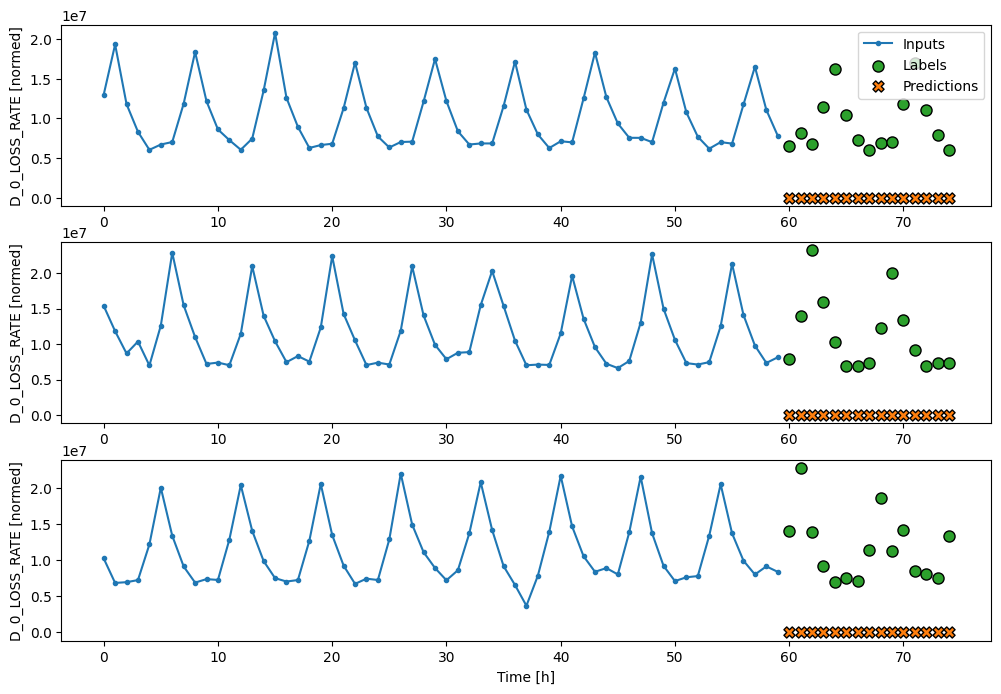

In [107]:
multi_val_performance['AR LSTM'] = feedback_model.evaluate(w1.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(w1.test, verbose=0, return_dict=True)
w1.plot(feedback_model)

In [108]:
batch_size = 1000
n_steps = 500

In [109]:
freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)

In [110]:
freq1.shape

(1000, 1)

In [111]:
time = np.linspace(0, 1, n_steps)

In [112]:
time.shape

(500,)

In [115]:
tmp = (time - offset1)*(freq1 * 10 + 10)

In [120]:
a = np.linspace(0, 1, 100)
b = np.linspace(0, 1, 1000)
b = b[..., np.newaxis]
c = a - b
print(c.shape)

(1000, 100)


In [122]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time-offsets1)*(freq1 * 10 + 10))
    series = 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [123]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

In [124]:
series.shape

(10000, 51, 1)

In [125]:
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]

In [126]:
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]

In [127]:
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [128]:
tmp = x_valid[:, -1]

In [129]:
tmp.shape

(2000, 1)

In [131]:
y_pred = x_valid[:, -1]

In [135]:
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.009160262

In [136]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [137]:
!cp ~/Downloads/lossrate_disbursement.csv ./

In [138]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [139]:
!ls

loss_arrival.csv           taxi-train.csv
lossrate_disbursement.csv  taxi-valid.csv
lr_time_series_model.ipynb taxifare.ipynb
ltv_tf_version.ipynb


<h3> RNN model for Time Series </h3>

In [140]:
df_features = pd.read_csv("lossrate_disbursement.csv")

In [415]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [141]:
df_features.columns

Index(['DISBURSEMENT_DS', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [144]:
df_features['timestamp'] = pd.to_datetime(df_features['DISBURSEMENT_DS'])

In [145]:
df_features['prior_info'] = 1

In [147]:
columns = ['timestamp', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'prior_info']
df1 = df_features.loc[:, columns].sort_values(by=['timestamp'])

In [150]:
df_loss = pd.read_csv("loss_arrival.csv")

In [152]:
df_loss['timestamp'] = pd.to_datetime(df_loss['DISBURSEMENT_DS'])
                                      

In [159]:
df_loss['disbursement'] = (df_loss['TOTAL_DISBURSEMENT_AMOUNT'] -  \
                           np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))/(np.max(df_loss['TOTAL_DISBURSEMENT_AMOUNT']) - \
                                                                          np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))

In [155]:
loss_columns = ['timestamp', 'disbursement', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE']

In [338]:
df2 = df_loss.loc[:, loss_columns].sort_values(by=['timestamp'])

In [391]:
df_combine.tail(30)

,timestamp,1,2,3,4,5,6,7,8,9,10,prior_info,disbursement,D_0_LOSS_RATE,D_1_LOSS_RATE
1193,2024-04-07,0.000021,0.000042,0.000062,0.000083,0.000104,0.000125,0.000146,0.000166,0.000187,0.000208,1,0.222009,0.151373,0.080867
1194,2024-04-08,0.000020,0.000040,0.000061,0.000081,0.000101,0.000121,0.000141,0.000162,0.000182,0.000202,1,0.245709,0.145387,0.081793
1195,2024-04-09,0.000020,0.000039,0.000059,0.000079,0.000098,0.000118,0.000138,0.000157,0.000177,0.000197,1,0.243979,0.162608,0.093252
1196,2024-04-10,0.000015,0.000030,0.000045,0.000060,0.000075,0.000090,0.000105,0.000119,0.000134,0.000149,1,0.380908,0.148485,0.084381
1197,2024-04-11,0.000011,0.000023,0.000034,0.000045,0.000057,0.000068,0.000080,0.000091,0.000102,0.000114,1,0.548062,0.149039,0.076039
1198,2024-04-12,0.000008,0.000016,0.000024,0.000031,0.000039,0.000047,0.000055,0.000063,0.000071,0.000079,1,0.874189,0.132290,0.074141
1199,2024-04-13,0.000012,0.000024,0.000036,0.000048,0.000060,0.000072,0.000084,0.000096,0.000108,0.000120,1,0.466060,0.165053,0.095682
1200,2024-04-14,0.000019,0.000038,0.000057,0.000076,0.000095,0.000114,0.000133,0.000152,0.000171,0.000190,1,0.259757,0.170842,0.101902
1201,2024-04-15,0.000018,0.000036,0.000054,0.000072,0.000090,0.000107,0.000125,0.000143,0.000161,0.000179,1,0.295189,0.171043,0.104972
1202,2024-04-16,0.000019,0.000038,0.000056,0.000075,0.000094,0.000113,0.000131,0.000150,0.000169,0.000188,1,0.277680,0.173423,0.106281


In [163]:
df_combine = pd.merge(df1, df2, on=['timestamp'], how='inner')

In [339]:
df3 = df_combine.iloc[20:]

In [340]:
df3 = df3.reset_index()

In [341]:
df3.head(3)

,index,timestamp,1,2,3,4,5,6,7,8,9,10,prior_info,disbursement,D_0_LOSS_RATE,D_1_LOSS_RATE
0,20,2021-01-20,0.000028,0.000056,0.000084,0.000113,0.000141,0.000169,0.000197,0.000225,0.000253,0.000281,1,0.024947,0.180715,0.129130
1,21,2021-01-21,0.000029,0.000059,0.000088,0.000117,0.000146,0.000176,0.000205,0.000234,0.000264,0.000293,1,0.022220,0.203693,0.144343
2,22,2021-01-22,0.000020,0.000040,0.000060,0.000080,0.000100,0.000120,0.000140,0.000160,0.000180,0.000200,1,0.070354,0.196075,0.136967


In [236]:
def get_timeseries(df):
    features = []
    linear_feature_columns = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'prior_info', 'disbursement']
    for i in range(30, df.shape[0]):
        features.append(df3['D_0_LOSS_RATE'][i-30:i])
    linear_features = np.array(df.loc[30:,linear_feature_columns])
    time_features_raw = np.array(features)
    time_features = np.expand_dims(time_features_raw, axis=2)
    label = np.array(df3['D_0_LOSS_RATE'][30:])
    print(linear_features.shape)
    print(time_features.shape)
    print(label.shape)
    return linear_features.astype(np.float32), time_features.astype(np.float32), label.astype(np.float32)
        

In [237]:
linear_features, time_features, label = get_timeseries(df3)

(1173, 12)
(1173, 30, 1)
(1173,)


In [238]:
length = linear_features.shape[0]

In [239]:
train_linear, train_time, train_label = linear_features[0:int(0.6*length)], time_features[0:int(0.6*length)], label[0:int(0.6*length)]

In [240]:
valid_linear, valid_time, valid_label = linear_features[int(0.6*length): int(0.8*length)], time_features[int(0.6*length): int(0.8*length)], label[int(0.6*length): int(0.8*length)]
test_linear, test_time, test_label = linear_features[int(0.8*length):], time_features[int(0.8*length):], label[int(0.8*length):]

In [295]:
train_linear = train_linear.reshape((-1, 12))

In [296]:
valid_linear = valid_linear.reshape((-1, 12))

In [416]:
train_linear.shape

(703, 12)

In [417]:
train_time.shape

(703, 30, 1)

In [343]:
dataset = tf.data.Dataset.from_tensor_slices(({'input_dense':train_linear, 'input_rnn':train_time}, train_label))

In [344]:
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_dense':valid_linear, 'input_rnn':valid_time}, valid_label))

In [372]:
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_dense':test_linear, 'input_rnn':test_time}, test_label))

In [345]:
batch_size = 16
dataset = dataset.shuffle(buffer_size=1173).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [346]:
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [373]:
test_dataset = test_dataset.batch(batch_size)

In [347]:
print(dataset.element_spec)

({'input_dense': TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), 'input_rnn': TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))


In [305]:
print(val_dataset.element_spec)

({'input_dense': TensorSpec(shape=(12,), dtype=tf.float32, name=None), 'input_rnn': TensorSpec(shape=(30, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(), dtype=tf.float32, name=None))


In [348]:
print(train_time.shape)

(703, 30, 1)


In [349]:
print(train_linear.shape)

(703, 12)


In [350]:
train_linear.shape

(703, 12)

In [351]:
train_time_padded = tf.keras.preprocessing.sequence.pad_sequences(train_time, maxlen=30, padding='post').astype(np.float32)
valid_time_padded = tf.keras.preprocessing.sequence.pad_sequences(valid_time, maxlen=30, padding='post').astype(np.float32)

In [408]:
def get_model():
    input_dense = tf.keras.Input(shape=(12 ,), name='input_dense')
    input_rnn = tf.keras.Input(shape=( 30, 1), name='input_rnn')
    dense_output = layers.Dense(30, activation='relu')(input_dense)
    dense_output = layers.Dense(10, activation='relu')(dense_output)
    rnn_output = layers.LSTM(10, return_sequences=True, input_shape=[None, 1])(input_rnn)
    rnn_output = layers.LSTM(5, return_sequences=False)(rnn_output)
    concatenated = layers.Concatenate()([dense_output, rnn_output])
    output = layers.Dense(1, activation='sigmoid')(concatenated)
    model = models.Model(inputs=(input_dense, input_rnn), outputs=output)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [205]:
input_dense = tf.keras.Input(shape=(12, ), name='input_dense')
input_rnn = tf.keras.Input(shape=(30, 1), name='input_rnn')

In [207]:
dense_output = layers.Dense(20, activation='relu')(input_dense)
dense_output = layers.Dense(10, activation='relu')(dense_output)

In [213]:
rnn_output = layers.LSTM(20, return_sequences=True, input_shape=[None, 1])(input_rnn)


In [214]:
rnn_output = layers.LSTM(10, return_sequences=False)(rnn_output)

In [215]:
concatenated = layers.Concatenate()([dense_output, rnn_output])

In [216]:
output = layers.Dense(1, activation='sigmoid')(concatenated)

In [219]:
model = models.Model(inputs=(input_dense, input_rnn), outputs=output)

In [303]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [409]:
model = get_model()

In [354]:
MAX_EPOCHS = 20

In [1]:
early_stopping = EarlyStopping(
    monitor='mse',  # Metric to monitor
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

NameError: name 'EarlyStopping' is not defined

In [355]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

In [358]:
history_np = model.fit({'input_dense': train_linear, 'input_rnn': train_time}, train_label,
                    epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5425e-04 - mse: 5.5425e-04 - val_loss: 3.6330e-04 - val_mse: 3.6330e-04
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1675e-04 - mse: 6.1675e-04 - val_loss: 3.6714e-04 - val_mse: 3.6714e-04
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8184e-04 - mse: 5.8184e-04 - val_loss: 3.7745e-04 - val_mse: 3.7745e-04
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1670e-04 - mse: 5.1670e-04 - val_loss: 3.6205e-04 - val_mse: 3.6205e-04
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6985e-04 - mse: 5.6985e-04 - val_loss: 3.6725e-04 - val_mse: 3.6725e-04
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4174e-04 - mse: 5.4174e-04 - val_loss: 3.7406e-04 - val_mse: 3.7406e-04
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1158e-04 - mse: 6.1158e-04 - val_loss: 3.6799e-04 - val_mse: 3.6799e-04
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7911e-04 - mse: 

In [364]:
valid_linear = 

(235, 12)

In [370]:
np.isnan(valid_time).any()

False

In [301]:
print(dataset.element_spec)

({'input_dense': TensorSpec(shape=(None, 12), dtype=tf.float32, name=None), 'input_rnn': TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))


In [302]:
print(val_dataset.element_spec)

({'input_dense': TensorSpec(shape=(12,), dtype=tf.float32, name=None), 'input_rnn': TensorSpec(shape=(30, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(), dtype=tf.float32, name=None))


In [410]:
history_tensor = model.fit(dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 3.4306e-04 - val_mse: 3.4306e-04
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5015e-04 - mse: 5.5015e-04 - val_loss: 3.1084e-04 - val_mse: 3.1084e-04
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7911e-04 - mse: 4.7911e-04 - val_loss: 3.0836e-04 - val_mse: 3.0836e-04
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7119e-04 - mse: 4.7119e-04 - val_loss: 2.9786e-04 - val_mse: 2.9786e-04
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2196e-04 - mse: 5.2196e-04 - val_loss: 3.1607e-04 - val_mse: 3.1607e-04
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3193e-04 - mse: 5.3193e-04 - val_loss: 3.0945e-04 - val_mse: 3.0945e-04
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0409e-04 - mse: 5.0409e-04 - val_loss: 2

In [411]:
prediction =model.predict(test_dataset)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [412]:
prediction_1 = np.squeeze(prediction, axis=-1)

In [392]:
test_label = test_label[0:-15]

In [413]:
prediction_1 = prediction_1[0:-15]

In [382]:
comparing = label[-235*2: -235]

In [394]:
comparing = comparing[0:-15]

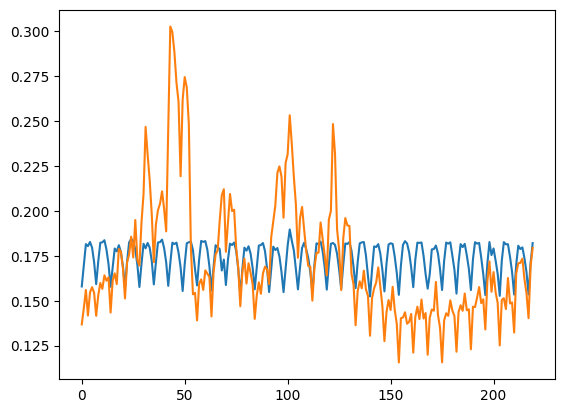

In [414]:
plt.plot(prediction_1)
plt.plot(test_label)


In [396]:
rmse = np.sqrt(np.mean(np.square(test_label - prediction_1)))

In [397]:
rmse

0.0338968

In [398]:
rmse = np.sqrt(np.mean(np.square(test_label - comparing)))

In [399]:
rmse

0.03833171

In [310]:
x_columns = []
y_columns = []
for i in range(0, 16):
    x_columns.append('D_' + str(i) + '_LOSS_RATE') 
y_columns.append('D_121_LOSS_RATE')

In [312]:
correlations = []
for col in x_columns:
    correlations.append(df[col].corr(df[y_columns[0]]))


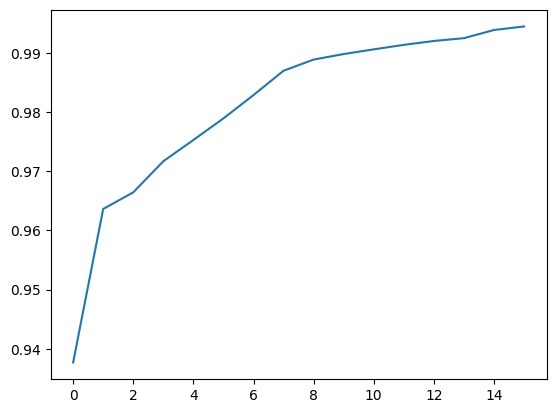

In [313]:
plt.plot(correlations)

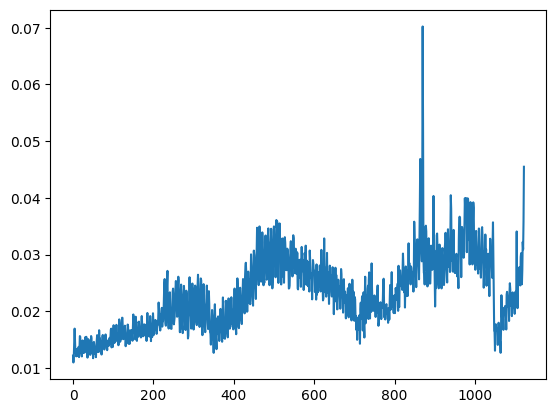

In [320]:
plt.plot(np.array(df[y_columns[0]])[100:])

<h3> Train dataset </h3>

In [418]:
path = "/Users/yanchunyang/Documents/training/learning_datasets/"
file1_name = "lossrate_disbursement.csv"
file2_name = "loss_arrival.csv"


In [419]:
def read_data():
    df_features = pd.read_csv(path + file1_name)
    df_loss = pd.read_csv(path + file2_name)
    return df_features, df_loss

In [472]:
def preprocessing(df_loss, df_features):
    df_loss['timestamp'] = pd.to_datetime(df_loss['DISBURSEMENT_DS'])
    df_loss['disbursement'] = (df_loss['TOTAL_DISBURSEMENT_AMOUNT'] -  \
                           np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))/(np.max(df_loss['TOTAL_DISBURSEMENT_AMOUNT']) - \
                                                                          np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))
    loss_columns = ['timestamp', 'disbursement', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE']
    df_loss_update = df_loss.loc[:, loss_columns].sort_values(by=['timestamp'])

    df_features['timestamp'] = pd.to_datetime(df_features['DISBURSEMENT_DS'])
    df_features['prior_info'] = 1

    columns = ['timestamp', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'prior_info']
    df_features_update = df_features.loc[:, columns].sort_values(by=['timestamp'])

    df_combine = pd.merge(df_features_update, df_loss_update, on=['timestamp'], how='inner')

    return df_combine.iloc[20:].reset_index()

In [535]:
def get_timeseries(dfs, n_loss=30):
    features = []
    linear_feature_columns = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'prior_info', 'disbursement']
    for i in range(n_loss, dfs.shape[0]):
        features.append(dfs['D_0_LOSS_RATE'][i-n_loss:i])
    linear_features_raw = np.array(dfs.loc[n_loss:,linear_feature_columns])
    linear_features = np.expand_dims(linear_features_raw, axis=2)
    time_features_raw = np.array(features)
    time_features = np.expand_dims(time_features_raw, axis=2)
    label = np.array(dfs['D_0_LOSS_RATE'][n_loss:])
    print(linear_features.shape)
    print(time_features.shape)
    print(label.shape)
    return linear_features.astype(np.float32), time_features.astype(np.float32), label.astype(np.float32)

In [536]:
def get_dataset(linear_features, time_features, label):
    length = linear_features.shape[0]
    train_linear, train_time, train_label = linear_features[0:int(0.6*length)], time_features[0:int(0.6*length)], label[0:int(0.6*length)]
    valid_linear, valid_time, valid_label = linear_features[int(0.6*length): int(0.8*length)], time_features[int(0.6*length): int(0.8*length)], label[int(0.6*length): int(0.8*length)]
    test_linear, test_time, test_label = linear_features[int(0.8*length):], time_features[int(0.8*length):], label[int(0.8*length):]
    train_dataset = tf.data.Dataset.from_tensor_slices(({'input_dense':train_linear, 'input_rnn':train_time}, train_label))
    val_dataset = tf.data.Dataset.from_tensor_slices(({'input_dense':valid_linear, 'input_rnn':valid_time}, valid_label))
    test_dataset = tf.data.Dataset.from_tensor_slices(({'input_dense':test_linear, 'input_rnn':test_time}, test_label))
    batch_size = 8
    train_dataset = train_dataset.batch(batch_size)
    val_dataset = val_dataset.batch(batch_size)
    test_dataset = test_dataset.batch(batch_size)
    return train_dataset, val_dataset, test_dataset

In [554]:
def get_model():
    input_dense = tf.keras.Input(shape=(12 ,1), name='input_dense')
    input_rnn = tf.keras.Input(shape=( 10, 1), name='input_rnn')
    conv_output = layers.Conv1D(filters=4,
                           kernel_size=(3,),
                           activation='relu')(input_dense)
    dense_output = layers.Dense(6, activation='relu')(conv_output)
    dense_output = layers.Flatten()(dense_output)
    rnn_output = layers.LSTM(10, return_sequences=True, input_shape=[None, 1])(input_rnn)
    rnn_output = layers.LSTM(4, return_sequences=False)(rnn_output)
    concatenated = layers.Concatenate()([dense_output, rnn_output])
    output = layers.Dense(1, activation='sigmoid')(concatenated)
    model = models.Model(inputs=(input_dense, input_rnn), outputs=output)
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['mse'])
    return model

In [425]:
df_loss.columns

Index(['DISBURSEMENT_DS', 'TOTAL_RECEIVABLES', 'TOTAL_DISBURSEMENT_AMOUNT',
       'TOTAL_PLEDGED_REVENUE', 'DIFF', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE',
       'D_2_LOSS_RATE', 'D_3_LOSS_RATE', 'D_4_LOSS_RATE',
       ...
       'D_351_LOSS_RATE', 'D_352_LOSS_RATE', 'D_353_LOSS_RATE',
       'D_354_LOSS_RATE', 'D_355_LOSS_RATE', 'D_356_LOSS_RATE',
       'D_357_LOSS_RATE', 'D_358_LOSS_RATE', 'D_359_LOSS_RATE',
       'D_360_LOSS_RATE'],
      dtype='object', length=366)

In [426]:
df_features.columns

Index(['DISBURSEMENT_DS', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       'timestamp'],
      dtype='object')

In [427]:
df_loss.columns

Index(['DISBURSEMENT_DS', 'TOTAL_RECEIVABLES', 'TOTAL_DISBURSEMENT_AMOUNT',
       'TOTAL_PLEDGED_REVENUE', 'DIFF', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE',
       'D_2_LOSS_RATE', 'D_3_LOSS_RATE', 'D_4_LOSS_RATE',
       ...
       'D_351_LOSS_RATE', 'D_352_LOSS_RATE', 'D_353_LOSS_RATE',
       'D_354_LOSS_RATE', 'D_355_LOSS_RATE', 'D_356_LOSS_RATE',
       'D_357_LOSS_RATE', 'D_358_LOSS_RATE', 'D_359_LOSS_RATE',
       'D_360_LOSS_RATE'],
      dtype='object', length=366)

In [429]:
df_loss['disbursement'] = (df_loss['TOTAL_DISBURSEMENT_AMOUNT'] -  \
                           np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))/(np.max(df_loss['TOTAL_DISBURSEMENT_AMOUNT']) - \
                                                                          np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))

In [484]:
df_features, df_loss = read_data()
df_combine = preprocessing(df_loss, df_features)

In [537]:
linear_feature, time_feature, label =  get_timeseries(df_combine, n_loss=10)

(1193, 12, 1)
(1193, 10, 1)
(1193,)


In [538]:
df_features.shape

(1223, 13)

In [539]:
train_dataset, val_dataset, test_dataset = get_dataset(linear_feature, time_feature, label)

In [487]:
linear_feature[0:2]

array([[1.300000e-05, 2.600000e-05, 3.900000e-05, 5.200000e-05,
        6.500000e-05, 7.800000e-05, 9.100000e-05, 1.040000e-04,
        1.170000e-04, 1.300000e-04, 1.000000e+00, 1.575711e-01],
       [2.100000e-05, 4.300000e-05, 6.400000e-05, 8.600000e-05,
        1.070000e-04, 1.290000e-04, 1.500000e-04, 1.710000e-04,
        1.930000e-04, 2.140000e-04, 1.000000e+00, 6.401160e-02]],
      dtype=float32)

In [493]:
print(test_dataset.element_spec)

({'input_dense': TensorSpec(shape=(12,), dtype=tf.float32, name=None), 'input_rnn': TensorSpec(shape=(10, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(), dtype=tf.float32, name=None))


In [439]:
length = tf.data.experimental.cardinality(val_dataset).numpy()

In [555]:
model = get_model()

In [556]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['mse'])

In [557]:
history_tensor = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 3.8055e-04 - val_mse: 3.8055e-04
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8687e-04 - mse: 6.8687e-04 - val_loss: 5.2850e-04 - val_mse: 5.2850e-04
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2309e-04 - mse: 7.2309e-04 - val_loss: 5.5157e-04 - val_mse: 5.5157e-04
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3290e-04 - mse: 7.3290e-04 - val_loss: 5.6013e-04 - val_mse: 5.6013e-04
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3875e-04 - mse: 7.3875e-04 - val_loss: 5.6089e-04 - val_mse: 5.6089e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4159e-04 - mse: 7.4159e-04 - val_loss: 5.5678e-04 - val_mse: 5.5678e-04
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4439e-04 - mse: 7.4439e-04 - val_loss: 5.4627e-04 - val_mse: 5.4627e-04
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4592e-04 - mse: 7.4592e-

In [558]:
prediction = model.predict(test_dataset)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [559]:
prediction_1 = np.squeeze(prediction, axis=-1)

In [506]:
labels = []
k = 0
for _, label in test_dataset:
    labels.append(label.numpy())
    k += 1
print(k)

30


2024-05-24 23:43:50.332293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [507]:
test_labels_np = np.concatenate(labels)

In [508]:
test_labels_np.shape

(239,)

In [509]:
prediction_1.shape

(239,)

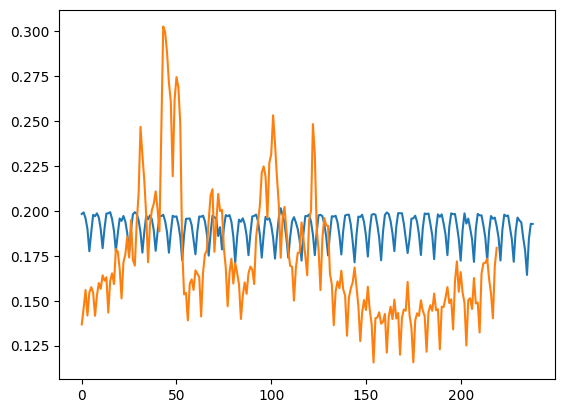

In [560]:
plt.plot(prediction_1)
plt.plot(test_label)

<h3> Test simple regression method </h3>

In [561]:
df_features.shape

(1223, 13)

In [562]:
df_loss.shape

(1223, 368)

In [571]:
def preprocessing(df_loss, df_features):
    df_loss['timestamp'] = pd.to_datetime(df_loss['DISBURSEMENT_DS'])
    df_loss['disbursement'] = (df_loss['TOTAL_DISBURSEMENT_AMOUNT'] -  \
                           np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))/(np.max(df_loss['TOTAL_DISBURSEMENT_AMOUNT']) - \
                                                                          np.min(df_loss['TOTAL_DISBURSEMENT_AMOUNT']))
    loss_columns = ['timestamp', 'disbursement', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE']
    df_loss_update = df_loss.loc[:, loss_columns].sort_values(by=['timestamp'])

    df_features['timestamp'] = pd.to_datetime(df_features['DISBURSEMENT_DS'])
    df_features['prior_info'] = 1

    columns = ['timestamp', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'prior_info']
    df_features_update = df_features.loc[:, columns].sort_values(by=['timestamp'])

    df_combine = pd.merge(df_features_update, df_loss_update, on=['timestamp'], how='inner')

    return df_combine[20:-20].reset_index()

In [572]:
df = preprocessing(df_loss, df_features)

In [565]:
df.columns

Index(['index', 'timestamp', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       'prior_info', 'disbursement', 'D_0_LOSS_RATE', 'D_1_LOSS_RATE'],
      dtype='object')

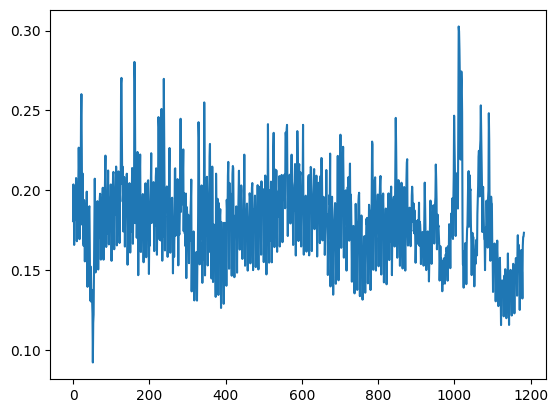

In [573]:
plt.plot(df.loc[-100:, ['D_0_LOSS_RATE']])

In [574]:
df.shape

(1183, 16)

In [687]:
def get_features_label(df, n_loss = 14):
    features = []
    linear_feature_columns = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'prior_info', 'disbursement']
    for i in range(n_loss, df.shape[0]):
        features.append(df['D_0_LOSS_RATE'][i - n_loss: i])
    linear_features = np.array(df.loc[n_loss:, linear_feature_columns])
    time_features = np.array(features)
    label = np.array(df['D_0_LOSS_RATE'][n_loss:] )
    df_combine = np.column_stack([linear_features, time_features])
    return df_combine, label
        
                               

In [688]:
df_clean, label = get_features_label(df)

In [689]:
df_clean.shape

(1169, 26)

In [690]:
label.shape

(1169,)

In [691]:
tf.keras.backend.clear_session()

In [692]:
def get_dataset(linear_features, label):
    length = linear_features.shape[0]
    train_linear, train_label = linear_features[0:int(0.8*length)], label[0:int(0.8*length)]
    test_linear, test_label = linear_features[int(0.8*length):],  label[int(0.8*length):]
    return train_linear,test_linear, train_label,  test_label

In [693]:
train_feature,  test_feature, train_label,  test_label = get_dataset(df_clean, label)

In [733]:
def tnn_linear_model(n):
    input_dense = tf.keras.Input(shape=(n, ), name='input_dense')
    dense_output = layers.Dense(10, activation='relu')(input_dense)
    output = layers.Dense(1, activation='sigmoid')(dense_output)
    model = models.Model(inputs=input_dense, outputs=output)
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [755]:
def get_test(model, test_feature, test_label):
    results = []
    length = test_feature.shape[0]
    prediction = model.predict(test_feature[0].reshape(1,-1))
    results.append(prediction[0][0])
    for i in range(1, length):
        tmp = test_feature[i].reshape(1, -1)
        tmp[0][-1] = results[-1]
        prediction = model.predict(tmp) 
        results.append(prediction[0][0])
    return np.array(results)

In [735]:
n = train_feature.shape[1]

In [736]:
model_linear = tnn_linear_model(n)

In [737]:
train_feature.shape

(935, 26)

In [750]:
test_feature[0].reshape(1,-1).shape

(1, 26)

In [757]:
prediction = get_test(model_linear, test_feature, test_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


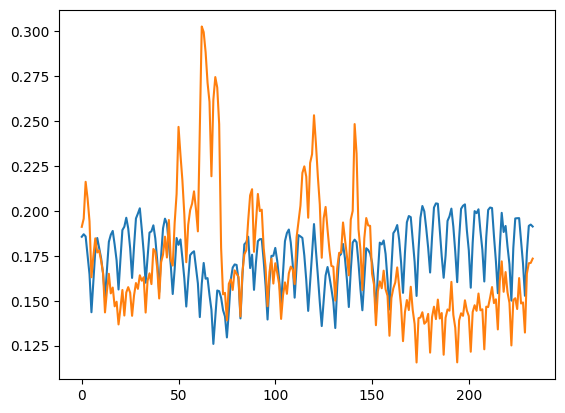

In [758]:
plt.plot(prediction)
plt.plot(test_label)

In [767]:
np.mean((prediction-test_label)**2)

0.0016031103700359674

In [771]:
last_prediction = [test_feature[-1][-4]] * 234

In [772]:
np.mean((last_prediction-test_label)**2)

0.002696834514618815

In [770]:
test_feature[-1][-2]

0.17084164

In [738]:
history_np = model_linear.fit({'input_dense':train_feature}, train_label, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0931 - mse: 0.0931 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 3.3901e-04 - val_mse: 3.3901e-04
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 6.7806e-04 - mse: 6.7806e-04 - val_loss: 3.1617e-04 - val_mse: 3.1617e-04
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 6.1084e-04 - mse: 6.1084e-04 - val_loss: 3.1934e-04 - val_mse: 3.1934e-04
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 6.5602e-04 - mse: 6.5602e-04 - val_loss: 3.1825e-04 - val_mse: 3.1825e-04
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 6.8337e-04 - mse: 6.8337e-04 - val_loss: 3.1746e-04 - val_mse: 3.1746e-04
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 6.4042e-04 - mse: 6.4042e-04 - val_loss: 3.171

In [739]:
def plot_timeseries(model, data_feature, data_label, backnum=None):
    prediction = model.predict(data_feature)
    prediction_1 =  np.squeeze(prediction, axis=-1)
    if backnum is None:
        plt.plot(prediction_1)
        plt.plot(data_label)
    else:
        plt.plot(prediction_1[-1*backnum:])
        plt.plot(data_label[-1*backnum:])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


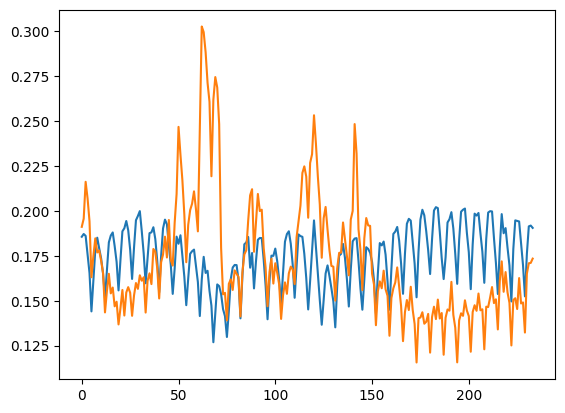

In [740]:
plot_timeseries(model_linear, test_feature, test_label)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


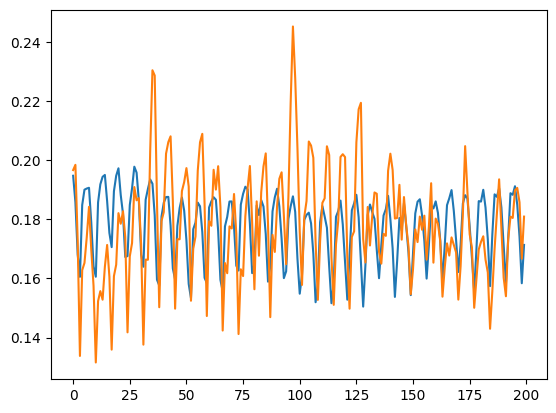

In [741]:
plot_timeseries(model_linear, train_feature, train_label, backnum=200)

In [773]:
!pwd

/Users/yanchunyang/Documents/training/learning_datasets


In [774]:
!ls

loss_arrival.csv           new_ltv_training.csv
lossrate_disbursement.csv  taxi-train.csv
lr_time_series_model.ipynb taxi-valid.csv
ltv_tf_version.ipynb       taxifare.ipynb
